In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## TABLA

In [2]:
names = ["1", "1_n", "2", "2_n", "3", "3_n"]

In [3]:
K = []
files = "shares_85-08.xlsx"
for i in names:
    df1 = pd.read_stata(f"{i}.dta")
    df1 = df1[~(df1["copB2_3"].isna())]
    df1 = df1[(df1["year"]<1909)]
    p10_90 = ((df1[(df1["copB2_3"]<90) & (df1["copB2_3"]>10) ].groupby("year")["cfips"].count() / df1.groupby("year")["cfips"].count() )*100).mean()
    P0_p100 = ((df1[(df1["copB2_3"]<=100) ].groupby("year")["cfips"].count() / df1.groupby("year")["cfips"].count() )*100).mean()
    p100_200 = ((df1[(df1["copB2_3"]>100) & (df1["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df1.groupby("year")["cfips"].count())*100).mean()
    p100 = ((df1[(df1["copB2_3"]>100)].groupby("year")["cfips"].count()/ df1.groupby("year")["cfips"].count())*100).mean()
    L = [round(p10_90,3), round(P0_p100,3), round(p100_200,3), round(p100,3)]
    K.append(L)
    # print(round(p10_90,3), ",", round(P0_p100,3),",", round(p100_200,3),",", round(p100,3))

dft = pd.DataFrame(K, columns = ['10  90', '<=100', "100 200", ">100"], index = ["ks_s", "ks_d", "mkt_s", "mkt_d", "nestab_s", "nestab_d"]) 
dft.to_excel(files)

# CODIGO PARA GRÁFICAS

In [4]:
#PRIMERA ESTIMACIÓN: DINÁMICA

df1 = pd.read_stata("1.dta")
df1 = df1[~(df1["copB2_3"].isna())]
# df1.rename(columns={"copB2_3": "C1"}, inplace = True)

df2 = pd.read_stata("2.dta")
df2 = df2[~(df2["copB2_3"].isna())]
# df2.rename(columns={"copB2_3": "C2"}, inplace = True)

df3 = pd.read_stata("3.dta")
df3 = df3[~(df3["copB2_3"].isna())]
# df3.rename(columns={"copB2_3": "C3"}, inplace = True)

In [5]:
#SEGUNDA ESTIMACIÓN: DINÁMICA

df1_n = pd.read_stata("1_n.dta")
df1_n = df1_n[~(df1_n["copB2_3"].isna())]
# df1.rename(columns={"copB2_3": "C1"}, inplace = True)

df2_n = pd.read_stata("2_n.dta")
df2_n = df2_n[~(df2_n["copB2_3"].isna())]
# df2.rename(columns={"copB2_3": "C2"}, inplace = True)

df3_n = pd.read_stata("3_n.dta")
df3_n = df3_n[~(df3_n["copB2_3"].isna())]
# df3.rename(columns={"copB2_3": "C3"}, inplace = True)

df4_n = pd.read_stata("4_n.dta")
df4_n = df4_n[~(df4_n["copB2_3"].isna())]

In [6]:
M1_1 = (df1[(df1["copB2_3"]<90)].groupby("year")["cfips"].count() / df1.groupby("year")["cfips"].count())*100
M2_1 = (df2[(df2["copB2_3"]<90)].groupby("year")["cfips"].count() / df2.groupby("year")["cfips"].count())*100
M3_1 = (df3[(df3["copB2_3"]<90)].groupby("year")["cfips"].count() / df3.groupby("year")["cfips"].count())*100

M1_1_n = (df1_n[(df1_n["copB2_3"]<90)].groupby("year")["cfips"].count() / df1_n.groupby("year")["cfips"].count())*100
M2_1_n = (df2_n[(df2_n["copB2_3"]<90)].groupby("year")["cfips"].count() / df2_n.groupby("year")["cfips"].count())*100
M3_1_n = (df3_n[(df3_n["copB2_3"]<90)].groupby("year")["cfips"].count() / df3_n.groupby("year")["cfips"].count())*100
M4_1_n = (df4_n[(df4_n["copB2_3"]<90)].groupby("year")["cfips"].count() / df4_n.groupby("year")["cfips"].count())*100

In [7]:
M1_2 = (df1[(df1["copB2_3"]>=90) & (df1["copB2_3"]<=100)].groupby("year")["cfips"].count() / df1.groupby("year")["cfips"].count())*100;
M2_2 = (df2[(df2["copB2_3"]>=90) & (df2["copB2_3"]<=100)].groupby("year")["cfips"].count() / df2.groupby("year")["cfips"].count())*100;
M3_2 = (df3[(df3["copB2_3"]>=90) & (df3["copB2_3"]<=100)].groupby("year")["cfips"].count() / df3.groupby("year")["cfips"].count())*100;

M1_2_n = (df1_n[(df1_n["copB2_3"]>=90) & (df1_n["copB2_3"]<=100)].groupby("year")["cfips"].count() / df1_n.groupby("year")["cfips"].count())*100;
M2_2_n = (df2_n[(df2_n["copB2_3"]>=90) & (df2_n["copB2_3"]<=100)].groupby("year")["cfips"].count() / df2_n.groupby("year")["cfips"].count())*100;
M3_2_n = (df3_n[(df3_n["copB2_3"]>=90) & (df3_n["copB2_3"]<=100)].groupby("year")["cfips"].count() / df3_n.groupby("year")["cfips"].count())*100;
M4_2_n = (df4_n[(df4_n["copB2_3"]>=90) & (df4_n["copB2_3"]<=100)].groupby("year")["cfips"].count() / df4_n.groupby("year")["cfips"].count())*100;

In [8]:
M1_3 = (df1[(df1["copB2_3"]>100) & (df1["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df1.groupby("year")["cfips"].count())*100;
M2_3 = (df2[(df2["copB2_3"]>100) & (df2["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df2.groupby("year")["cfips"].count())*100;
M3_3 = (df3[(df3["copB2_3"]>100) & (df3["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df3.groupby("year")["cfips"].count())*100;

M1_3_n = (df1_n[(df1_n["copB2_3"]>100) & (df1_n["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df1_n.groupby("year")["cfips"].count())*100;
M2_3_n = (df2_n[(df2_n["copB2_3"]>100) & (df2_n["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df2_n.groupby("year")["cfips"].count())*100;
M3_3_n = (df3_n[(df3_n["copB2_3"]>100) & (df3_n["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df3_n.groupby("year")["cfips"].count())*100;
M4_3_n = (df4_n[(df4_n["copB2_3"]>100) & (df4_n["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df4_n.groupby("year")["cfips"].count())*100;

In [9]:
M1_4 = (df1[(df1["copB2_3"]>200)].groupby("year")["cfips"].count() / df1.groupby("year")["cfips"].count())*100
M2_4 = (df2[(df2["copB2_3"]>200)].groupby("year")["cfips"].count() / df2.groupby("year")["cfips"].count())*100
M3_4 = (df3[(df3["copB2_3"]>200)].groupby("year")["cfips"].count() / df3.groupby("year")["cfips"].count())*100

M1_4_n = (df1_n[(df1_n["copB2_3"]>200)].groupby("year")["cfips"].count() / df1_n.groupby("year")["cfips"].count())*100
M2_4_n = (df2_n[(df2_n["copB2_3"]>200)].groupby("year")["cfips"].count() / df2_n.groupby("year")["cfips"].count())*100
M3_4_n = (df3_n[(df3_n["copB2_3"]>200)].groupby("year")["cfips"].count() / df3_n.groupby("year")["cfips"].count())*100
M4_4_n = (df4_n[(df4_n["copB2_3"]>200)].groupby("year")["cfips"].count() / df4_n.groupby("year")["cfips"].count())*100

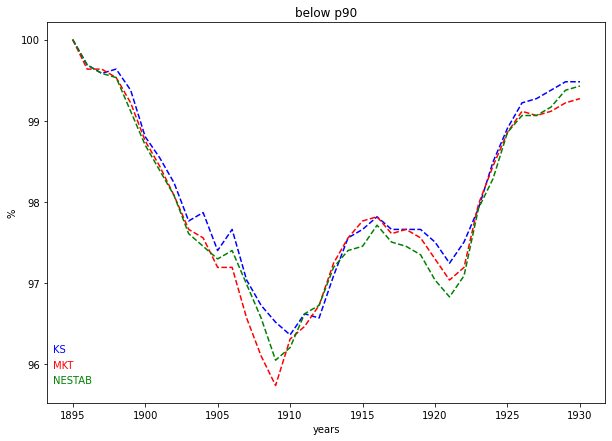

In [12]:
fig, ax = plt.subplots(figsize=(10,7))

M1_1_n.plot(color='blue', linestyle='--')

M2_1_n.plot(color='red', linestyle='--')

M3_1_n.plot(color='green', linestyle='--')

# M4_1_n.plot(color='orange', linestyle='--')


plt.ylabel("%")
plt.xlabel("years")
plt.title("below p90")

plt.text(0.01, 0.14, 'KS', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="blue")
plt.text(0.01, 0.10, 'MKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="red")
plt.text(0.01, 0.06, 'NESTAB', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="green")
# plt.text(0.01, 0.02, 'FMKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="orange")

plt.savefig("TS_90.png")


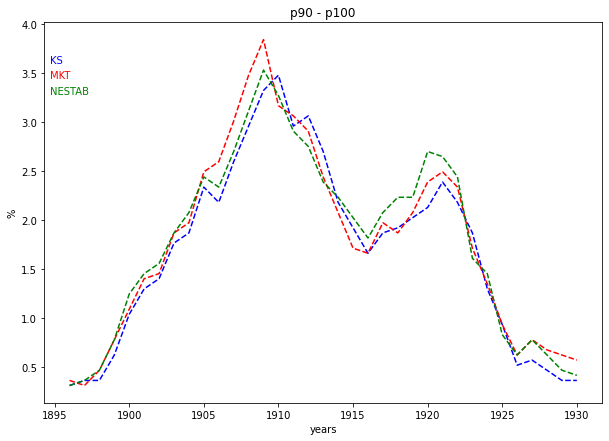

In [13]:
fig, ax = plt.subplots(figsize=(10,7))



M1_2_n.plot(color='blue', linestyle='--')


M2_2_n.plot(color='red', linestyle='--')


M3_2_n.plot(color='green', linestyle='--')

# M4_2_n.plot(color='orange', linestyle='--')


plt.ylabel("%")
plt.xlabel("years")
plt.title("p90 - p100")
plt.text(0.01, 0.90, 'KS', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="blue")
plt.text(0.01, 0.86, 'MKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="red")
plt.text(0.01, 0.82, 'NESTAB', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="green")
# plt.text(0.01, 0.78, 'FMKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="orange")

plt.savefig("TS_90-100.png")

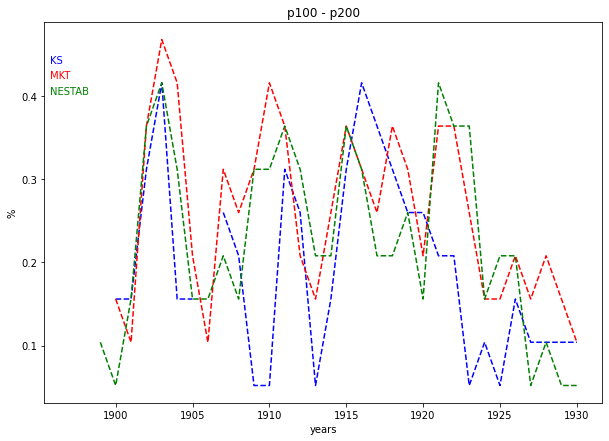

In [14]:
fig, ax = plt.subplots(figsize=(10,7))



M1_3_n.plot(color='blue', linestyle='--')


M2_3_n.plot(color='red', linestyle='--')


M3_3_n.plot(color='green', linestyle='--')


# M4_3_n.plot(color='orange', linestyle='--')



plt.ylabel("%")
plt.xlabel("years")
plt.title("p100 - p200")
plt.text(0.01, 0.90, 'KS', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="blue")
plt.text(0.01, 0.86, 'MKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="red")
plt.text(0.01, 0.82, 'NESTAB', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="green")
# plt.text(0.01, 0.78, 'FMKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="orange")
plt.savefig("TS_100-200.png")

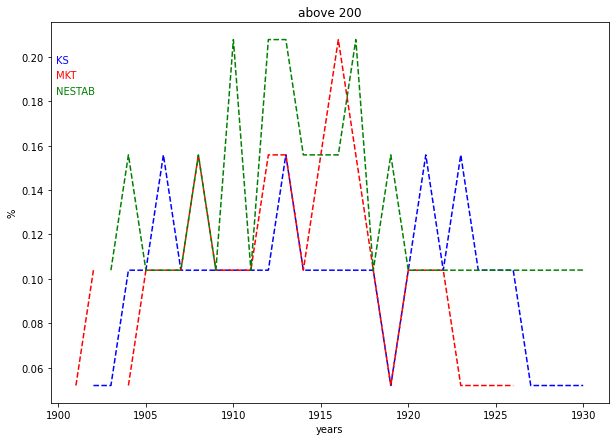

In [15]:
fig, ax = plt.subplots(figsize=(10,7))


M1_4_n.plot(color='blue', linestyle='--')


M2_4_n.plot(color='red', linestyle='--')


M3_4_n.plot(color='green', linestyle='--')


# M4_4_n.plot(color='orange', linestyle='--')



plt.ylabel("%")
plt.xlabel("years")

plt.title("above 200")
plt.text(0.01, 0.90, 'KS', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="blue")
plt.text(0.01, 0.86, 'MKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="red")
plt.text(0.01, 0.82, 'NESTAB', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="green")
# plt.text(0.01, 0.78, 'FMKT', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, color="orange")
plt.savefig("TS_200.png")

In [92]:
ks = pd.DataFrame({"1": M1_1.values, "2":M1_2.values, "3": M1_3.values, "4": M1_4.values} , index = M1_1.index)
ks.reset_index(inplace = True)
ks["T"] = ks["year"].apply(lambda x: 1 if x<1909 else 0) #1 if <09, 1 dlc
ks = ks.groupby(["T"])[["1", "2", "3", "4"]].agg(nanmean)
ks["cat"] = "ks"

In [93]:
mkt = pd.DataFrame({"1": M2_1.values, "2":M2_2.values, "3": M2_3.values, "4": M2_4.values} , index = M2_1.index)
mkt.reset_index(inplace = True)
mkt["T"] = mkt["year"].apply(lambda x: 1 if x<1909 else 0) #1 if <09, 1 dlc
mkt = mkt.groupby(["T"])[["1", "2", "3", "4"]].agg(nanmean)
mkt["cat"] = "mkt"

In [94]:
nestab = pd.DataFrame({"1": M3_1.values, "2":M3_2.values, "3": M3_3.values, "4": M3_4.values} , index = M3_1.index)
nestab.reset_index(inplace = True)
nestab["T"] = nestab["year"].apply(lambda x: 1 if x<1909 else 0) #1 if <09, 1 dlc
nestab = nestab.groupby(["T"])[["1", "2", "3", "4"]].agg(nanmean)
nestab["cat"] = "nestab"

In [95]:
A = ks.append(mkt)
B = A.append(nestab)

In [100]:
B.rename(columns = {"1": "p10-p90", "2":"p90-p100", "3": "p100-p200", "4": "p200+"}, inplace = True)
B.to_excel("average_category_table.xlsx")

In [23]:
df5 = df5[["year", "cfips", "C1", "C2", "C3", "activity", "a"]]

In [22]:
df4 = pd.merge(df1,df2, how="inner", on = ["year", "cfips"])
df5 = pd.merge(df4,df3, how="inner", on = ["year", "cfips"])

In [ ]:
df1 = pd.read_stata("1.dta")

In [22]:
# x = "3"
# df = pd.read_stata(f"{x}.dta")
# df = df[~(df["copB2_3"].isna())]

In [ ]:
df = pd.merge([df1,df2,df3], axis=0)
df = df[~(df["copB2_3"].isna())]

In [24]:
# df = df[ (df["year"]< 1915)  & (df["year"]> 1900)] #restringida

In [28]:

df_a = df.copy()

M1 = (df_a[(df_a["copB2_3"]<90)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M2 = (df_a[(df_a["copB2_3"]>=90) & (df_a["copB2_3"]<=100)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M3 = (df_a[(df_a["copB2_3"]>100) & (df_a["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df_a.groupby("year")["cfips"].count())*100;
M4 = (df_a[(df_a["copB2_3"]>200)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100

M1 = M1.reset_index()
M1.rename(columns = {"cfips": "<90"}, inplace = True)
M2 = M2.reset_index()
M2.rename(columns = {"cfips": "90-100"}, inplace = True)
M3 = M3.reset_index()
M3.rename(columns = {"cfips": "100-200"}, inplace = True)
M4 = M4.reset_index()
M4.rename(columns = {"cfips": ">200"}, inplace = True);

M5 = pd.merge(M1, M2, how = "left", on="year")
M6 = pd.merge(M5, M3, how = "left", on="year")
M7 = pd.merge(M6, M4, how = "left", on="year")

M7 = M7.replace(np.nan, 0)

## All for only p10-90

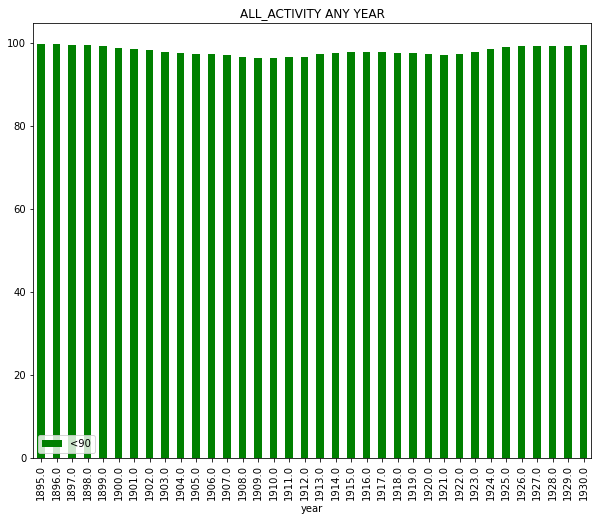

In [29]:
M1.set_index('year').plot(kind="bar",stacked=True,figsize=(10,8), color = "green")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.legend(loc="lower left")
plt.title("ALL_P10-P90")
# plt.savefig(f"ALL_P10-P90.png")
plt.show()

## All for only p90-p100

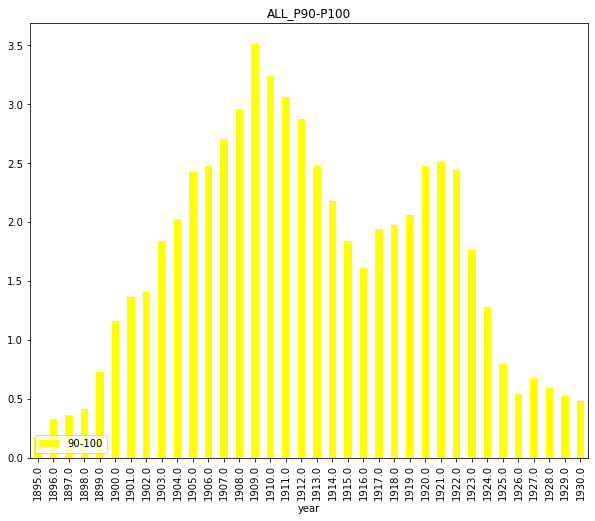

In [31]:
M2.set_index('year').plot(kind="bar",stacked=True,figsize=(10,8), color = "yellow")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.legend(loc="lower left")
plt.title("ALL_P90-P100")
# plt.savefig(f"ALL_P90-P100.png")
plt.show()

## All for only p100-p200, p200>

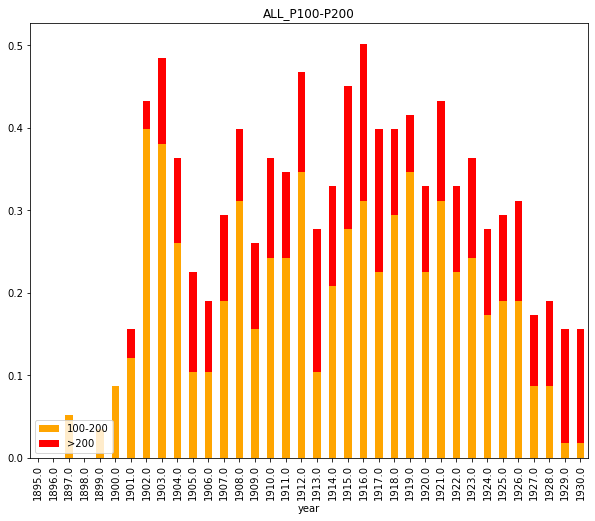

In [34]:
M8 = pd.merge(M3, M4, how = "left", on="year")
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["orange", "red"])
M8.set_index('year').plot(kind="bar",stacked=True,figsize=(10,8), cmap = cmap)
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.legend(loc="lower left")
plt.title("ALL_P100-P200")
# plt.savefig(f"ALL_P90-P100.png")
plt.show()

# Activity

In [11]:
df_a = df[df.activity == 1]

df_a = df.copy()

M1 = (df_a[(df_a["copB2_3"]<90)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M2 = (df_a[(df_a["copB2_3"]>=90) & (df_a["copB2_3"]<=100)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M3 = (df_a[(df_a["copB2_3"]>100) & (df_a["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df_a.groupby("year")["cfips"].count())*100;
M4 = (df_a[(df_a["copB2_3"]>200)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100

M1 = M1.reset_index()
M1.rename(columns = {"cfips": "<90"}, inplace = True)
M2 = M2.reset_index()
M2.rename(columns = {"cfips": "90-100"}, inplace = True)
M3 = M3.reset_index()
M3.rename(columns = {"cfips": "100-200"}, inplace = True)
M4 = M4.reset_index()
M4.rename(columns = {"cfips": ">200"}, inplace = True);

M5 = pd.merge(M1, M2, how = "left", on="year")
M6 = pd.merge(M5, M3, how = "left", on="year")
M7 = pd.merge(M6, M4, how = "left", on="year")

M7 = M7.replace(np.nan, 0)

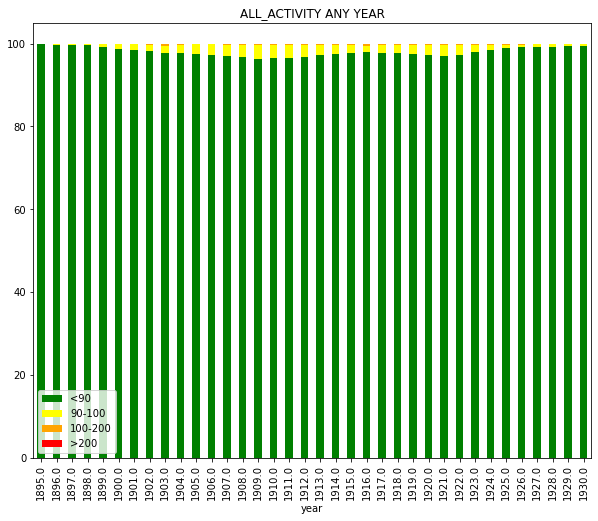

In [12]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","orange", "red"])
M7.set_index('year').plot(kind="bar",stacked=True,figsize=(10,8), cmap = cmap)
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.legend(loc="lower left")
plt.title("ALL_ACTIVITY ANY YEAR")
plt.savefig(f"ALL_ACTIVITY ANY YEAR.png")
plt.show()

#AZUL DEBAJO, VERDE RANDOM, AMARILLO Y ROJO O ANARANJADO Y ROJO

# Observed

In [148]:

df_a = df[df.a > 0]

M1 = (df_a[(df_a["copB2_3"]<90)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M2 = (df_a[(df_a["copB2_3"]>=90) & (df_a["copB2_3"]<=100)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100;
M3 = (df_a[(df_a["copB2_3"]>100) & (df_a["copB2_3"]<=200)].groupby("year")["cfips"].count()/ df_a.groupby("year")["cfips"].count())*100;
M4 = (df_a[(df_a["copB2_3"]>200)].groupby("year")["cfips"].count() / df_a.groupby("year")["cfips"].count())*100

M1 = M1.reset_index()
M1.rename(columns = {"cfips": "<90"}, inplace = True)
M2 = M2.reset_index()
M2.rename(columns = {"cfips": "90-100"}, inplace = True)
M3 = M3.reset_index()
M3.rename(columns = {"cfips": "100-200"}, inplace = True)
M4 = M4.reset_index()
M4.rename(columns = {"cfips": ">200"}, inplace = True);

M5 = pd.merge(M1, M2, how = "left", on="year")
M6 = pd.merge(M5, M3, how = "left", on="year")
M7 = pd.merge(M6, M4, how = "left", on="year")

M7 = M7.replace(np.nan, 0)

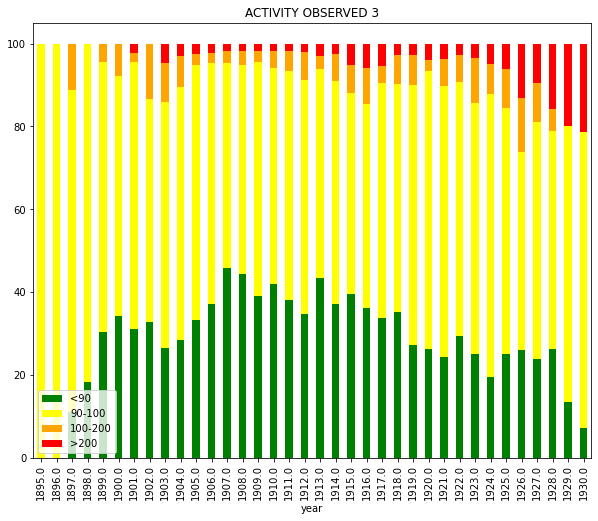

In [149]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","orange", "red"])
M7.set_index('year').plot(kind="bar",stacked=True,figsize=(10,8), cmap = cmap)
plt.legend(loc="lower left")
plt.title(f"ACTIVITY OBSERVED {x}")
plt.savefig(f"figuras\{x}_ACTIVITY OBSERVED.png")
plt.show()

#AZUL DEBAJO, VERDE RANDOM, AMARILLO Y ROJO O ANARANJADO Y ROJO